<AxesSubplot:xlabel='Date'>

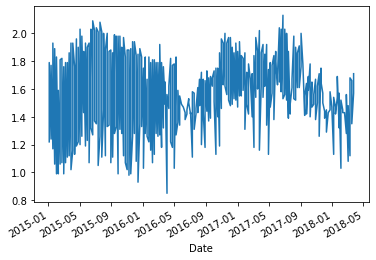

In [15]:
import pandas as pd

#import Avocado data set
df = pd.read_csv("avocado.csv")

#let pandas know you're reading in a date
df['Date'] = pd.to_datetime(df["Date"])

#Limit to only the Albany locations
albany_df = df[df["region"]=="Albany"]

#Set Dates as the index
albany_df.set_index("Date", inplace=True)

#plot the average prices
albany_df["AveragePrice"].plot()

<AxesSubplot:xlabel='Date'>

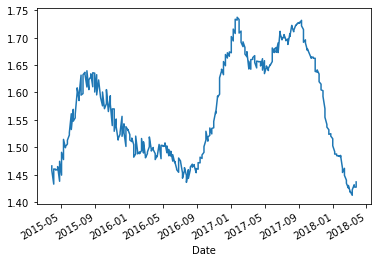

In [31]:
#Using a moving average to smooth out line - condensing the data
albany_df['AveragePrice'].rolling(25).mean().plot()

<AxesSubplot:xlabel='Date'>

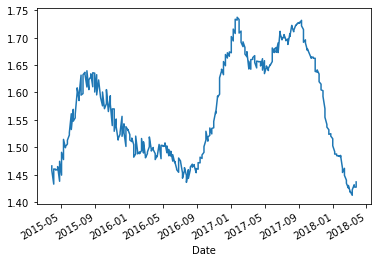

In [33]:
#Uh oh! Something is wrong - Let's find out what's wrong
albany_df.index

#The dates are not in order! Let's make sure they're in order.
albany_df.sort_index(inplace=True)

albany_df['AveragePrice'].rolling(25).mean().plot()

In [34]:
#How to condense take this data column and convert it back to csv or add it to out data set
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

<ipython-input-34-3b7be1d48287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()


In [37]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,NaN


In [38]:
albany_df.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [39]:
#If you want to drop the NA values
#Note: NAN is not a value
albany_df.dropna().head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


In [42]:
#Tell pandas - Hey - We know we may be overwriting the original dataframe. Chill
albany_df = df.copy()[df["region"] == "Albany"]
albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

In [43]:
#At the end of the day - Pandas can be expressed as a list of arrays
df.values

array([[0, Timestamp('2015-12-27 00:00:00'), 1.33, ..., 'conventional',
        2015, 'Albany'],
       [1, Timestamp('2015-12-20 00:00:00'), 1.35, ..., 'conventional',
        2015, 'Albany'],
       [2, Timestamp('2015-12-13 00:00:00'), 0.93, ..., 'conventional',
        2015, 'Albany'],
       ...,
       [9, Timestamp('2018-01-21 00:00:00'), 1.87, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [10, Timestamp('2018-01-14 00:00:00'), 1.93, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [11, Timestamp('2018-01-07 00:00:00'), 1.62, ..., 'organic', 2018,
        'WestTexNewMexico']], dtype=object)

In [46]:
#convert all the regions to a set - be able to see all the regions
#Note: if you left set off and just used tolist(), then every instance of a region would be put into a list
set(df['region'].values.tolist())

{'Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico'}

In [47]:
#now lets change this 'set' into a 'list' so we can iterate over that list
list(set(df['region'].values.tolist()))

['DallasFtWorth',
 'NewOrleansMobile',
 'Indianapolis',
 'GrandRapids',
 'Southeast',
 'Jacksonville',
 'Midsouth',
 'NewYork',
 'Columbus',
 'RichmondNorfolk',
 'BuffaloRochester',
 'Portland',
 'Albany',
 'SouthCentral',
 'Tampa',
 'RaleighGreensboro',
 'Philadelphia',
 'GreatLakes',
 'HarrisburgScranton',
 'Northeast',
 'Boston',
 'Boise',
 'TotalUS',
 'BaltimoreWashington',
 'LosAngeles',
 'CincinnatiDayton',
 'Seattle',
 'StLouis',
 'Roanoke',
 'HartfordSpringfield',
 'Denver',
 'Syracuse',
 'NorthernNewEngland',
 'Spokane',
 'Charlotte',
 'SanDiego',
 'Pittsburgh',
 'Plains',
 'SouthCarolina',
 'California',
 'Orlando',
 'WestTexNewMexico',
 'Houston',
 'Sacramento',
 'Chicago',
 'Nashville',
 'Atlanta',
 'SanFrancisco',
 'MiamiFtLauderdale',
 'LasVegas',
 'PhoenixTucson',
 'West',
 'Detroit',
 'Louisville']

In [48]:
#There's an EASIER WAY!!
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [52]:
#Now we want to restructure this data set to make it easier to plot
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        #Add two brackets [[]] to differentiat between 'Series' & 'dataframe'
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [54]:
#Since we have two tupe of types then we are going through
#the two different types
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [58]:
import pandas as pd

#import Avocado data set
df = pd.read_csv("avocado.csv")

#let pandas know you're reading in a date
df = df.copy()[df['type']=="organic"]
df['Date'] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)

#Now we want to restructure this data set to make it easier to plot
graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        #Add two brackets [[]] to differentiat between 'Series' & 'dataframe'
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

graph_df.tail()

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


<AxesSubplot:xlabel='Date'>

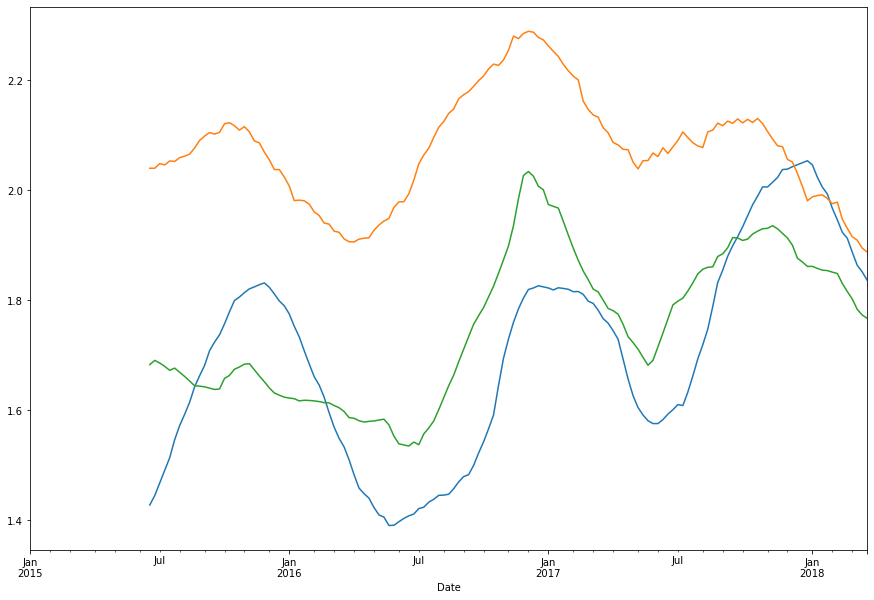

In [69]:
graph_df['California_price25ma'].plot(figsize=(15,10))
graph_df['NewYork_price25ma'].plot(figsize=(15,10))
graph_df['Chicago_price25ma'].plot(figsize=(15,10))